In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# Get the data and Clean

In [2]:
# The delimiter is `;`, so we need to rearrange the data into columns

input_file = 'dataset.csv'


# Load data

output_file = 'path_to_cleaned.csv'

# Read the csv into a DataFrame
df = pd.read_csv(input_file, sep=';')

# Save the DataFrame to a new CSV file with proper columns
df.to_csv(output_file, index=False)


def load_data(*args):
    return pd.read_csv(output_file)

In [3]:
Forest = load_data()
Forest.describe(include='all')

,Orario,Umidità dell'aria (%),Pressione (mPa),Temperatura dell'aria (°C),Punto di rugiada (°C),Direzione del vento (°),Velocità media del vento (km/h),Batteria (V),Fotocamera,Tipo di device,...,Temperatura suolo 5 (°C),Temperatura suolo 6 (°C),Temperatura suolo 7 (°C),Temperatura suolo 8 (°C),Temperatura suolo 9 (°C),vpd,Umidità fogliare 1 (min),Umidità fogliare 2 (min),ID Sensore,Descrizione
count,8734,0.0,0.0,0.0,0.0,0.0,0.0,8734.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8734.0,8734,8734
unique,8734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,2023-07-27 09:00:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE6008D81F7F6E25,Paulownia - xNode #1
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8734,8734
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.203111,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.177829,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.650000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.260000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.270000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.270000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [4]:
print(Forest.columns)

Index(['Orario', 'Umidità dell'aria (%)', 'Pressione (mPa)',
       'Temperatura dell'aria (°C)', 'Punto di rugiada (°C)',
       'Direzione del vento (°)', 'Velocità media del vento (km/h)',
       'Batteria (V)', 'Fotocamera', 'Tipo di device', 'flags', 'hw',
       'Latitudine', 'Livello liquido (mm)', 'Longitudine', 'Lux',
       'Umidità fogliare (%)', 'Umidità suolo superficie (%)',
       'Umidità suolo profondità (%)', 'Massima velocità del vento (km/h)',
       'Temperatura liquido (°C)', 'pH', 'Foto', 'Pannello solare',
       'Quantità di pioggia (mm)', 'Qualità Segnale (dBm)', 'rst', 'sd',
       'Potenziale idrico 1 (Superficie)', 'Potenziale idrico 2',
       'Umidità suolo 1 (Superficie) (%)', 'Umidità suolo 2 (%)',
       'Umidità suolo 3 (%)', 'Umidità suolo 4 (%)', 'Umidità suolo 5 (%)',
       'Umidità suolo 6 (%)', 'Umidità suolo 7 (%)', 'Umidità suolo 8 (%)',
       'Umidità suolo 9 (%)', 'sms1', 'sms2', 'SNR',
       'Radiazione solare (W/m2)', 'Salinità suolo 1 (

In [5]:
# There are many columns where count is zero (basically many NaNs).
# We drop these values

columns_to_drop = []

for i in Forest.columns:
    if Forest[i].describe().loc['count'] == 0:
        columns_to_drop.append(i)

Forest = Forest.drop(columns=columns_to_drop)


In [6]:
# Many columns are all zeros. To check that, we look for columns that have a mean value of zero and a maximum value of zero

columns_to_drop = []

for i in Forest.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(Forest[i]):
        desc = Forest[i].describe()
        if desc.get('mean') == 0 and desc.get('max') == 0:
            columns_to_drop.append(i)

Forest = Forest.drop(columns=columns_to_drop)

In [7]:
# We check that these four pairs of columns are exactly the same, if so, we can drop them


diff = (Forest["Umidità suolo superficie (%)"] - Forest["Umidità suolo 1 (Superficie) (%)"]).to_numpy()

print([x for x in diff if x != 0])

diff_2 = (Forest["Umidità suolo profondità (%)"] - Forest["Umidità suolo 2 (%)"]).to_numpy()

print([x for x in diff_2 if x != 0])

diff_3 = (Forest["Temperatura suolo 1 (Superficie) (°C)"] + 99).to_numpy()

print([x for x in diff_3 if x != 0])

diff_3 = (Forest["Temperatura suolo 2 (°C)"] + 99).to_numpy()

print([x for x in diff if x != 0])

# Also, the type of sensor and plant are important information in general, and they should be converted to categorical attributes (matrix) to 
# be analyzed by some machine learning algorithm. However, in the present case they are all the same, and for simplicity we drop these terms 
# (this is a kind of dimensionality reduction)

Forest = Forest.drop(columns = ["Umidità suolo 1 (Superficie) (%)","Umidità suolo 2 (%)","Temperatura suolo 1 (Superficie) (°C)","Temperatura suolo 2 (°C)",\
                      "ID Sensore","Descrizione"])

[]
[]
[]
[]


In [8]:
# We convert the time into a number

Forest['Orario'] = Forest['Orario'].str.rstrip(':')

Forest['Orario'] = pd.to_datetime(Forest['Orario'])


In [9]:
# Convert datetime to timestamp
Forest['time_numeric'] = Forest['Orario'].astype(int) / 10**9  #(I divide by 10**9 to get the time in seconds)

# If you want to convert back, use pd.to_datetime(Forest['time_numeric'], unit='s')



In [10]:
Forest = Forest.drop(columns = ['Orario'])

In [11]:
Forest.head()

,Batteria (V),Umidità suolo superficie (%),Umidità suolo profondità (%),time_numeric
0,4.27,14.3,16.20,1.690448e+09
1,4.27,14.4,16.20,1.690445e+09
2,4.27,14.4,16.25,1.690441e+09
3,4.27,14.5,16.20,1.690438e+09
4,4.26,14.5,16.25,1.690434e+09


# Visualize the data

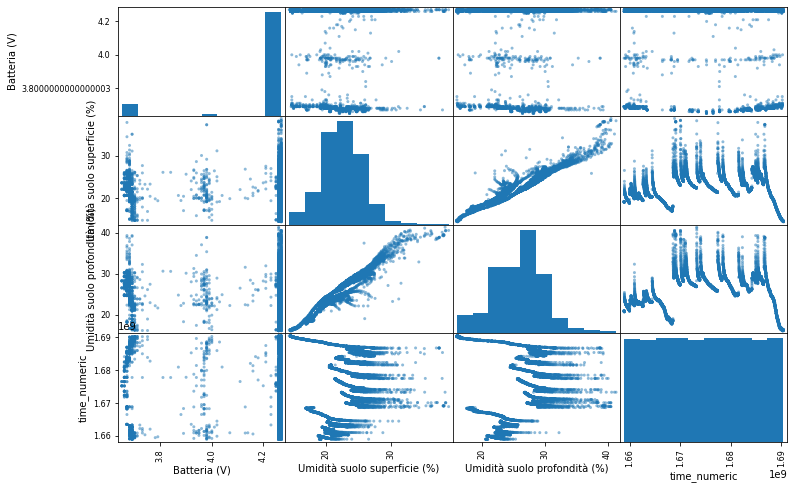

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["Batteria (V)", "Umidità suolo superficie (%)", "Umidità suolo profondità (%)", "time_numeric"]

scatter_matrix(Forest[attributes], figsize=(12,8))
plt.show()

There are some clear correlations that we need to establish. According to intuition, the surface humidity and deep humidity are correlated 
(basically are linearly dependent), and both change over time. Other correlations, if exists, are not clear from simple visualization

# Select and train a model

## We create a test and training test

We must be careful on how we create the test set, because we don't want to lose the stratification of the data. We must create some strata, i.e., homogeneous subgroups. Thus, we choose to create categories for Umidità suolo superficie

In [18]:
hum_arr = Forest["Umidità suolo superficie (%)"].to_numpy()

print(hum_arr.max(),hum_arr.min())

38.9 14.3


<AxesSubplot:>

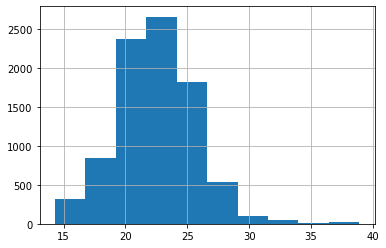

In [19]:
Forest["Umidità suolo superficie (%)"].hist()

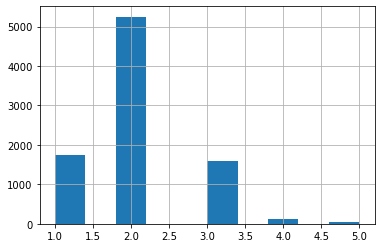

In [20]:

Forest["Humidity_cat"]=pd.cut(Forest["Umidità suolo superficie (%)"],
                              bins=[-np.inf, 20, 25, 30 , 35 , np.inf],
                             labels=[1,2,3,4,5])
Forest["Humidity_cat"].hist()



Split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in Split.split(Forest, Forest["Humidity_cat"]): #split generates indices to split data into training and test set
    strat_train_set = Forest.loc[train_index]
    strat_test_set = Forest.loc[test_index]

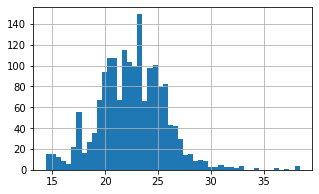

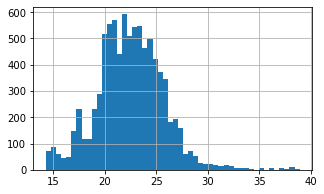

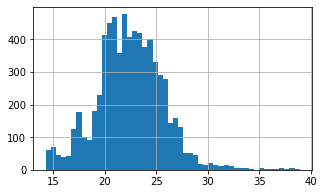

In [21]:
plt.show(strat_test_set["Umidità suolo superficie (%)"].hist(bins=50, figsize=(5,3)))
plt.show(Forest["Umidità suolo superficie (%)"].hist(bins=50, figsize=(5,3)))
plt.show(strat_train_set["Umidità suolo superficie (%)"].hist(bins=50, figsize=(5,3)))

## Now we can do the training 

In [22]:
strat_train_set

,Batteria (V),Umidità suolo superficie (%),Umidità suolo profondità (%),time_numeric,Humidity_cat
6376,4.27,17.90,19.15,1.667416e+09,1
7336,4.27,20.40,23.30,1.663960e+09,2
3401,4.27,24.30,28.70,1.678162e+09,2
5301,4.26,27.05,32.05,1.671286e+09,3
776,4.27,21.70,26.20,1.687651e+09,2
...,...,...,...,...,...
6687,4.27,19.50,22.55,1.666296e+09,1
204,4.27,15.70,16.95,1.689710e+09,1
3160,4.26,23.85,29.00,1.679029e+09,2
1544,4.27,24.60,28.30,1.684886e+09,2


We want to extract the following information: I give a time, and the code should provide me with battery, surface humidity, and deep humidity

In [28]:
prep_data = strat_train_set.drop(['Umidità suolo profondità (%)', 'Umidità suolo superficie (%)', 'Batteria (V)'], axis=1)

label_data = strat_train_set[['Umidità suolo profondità (%)', 'Umidità suolo superficie (%)', 'Batteria (V)']].copy()

prep_test_data = strat_test_set.drop(['Umidità suolo profondità (%)', 'Umidità suolo superficie (%)', 'Batteria (V)'], axis=1)

label_test_data = strat_test_set[['Umidità suolo profondità (%)', 'Umidità suolo superficie (%)', 'Batteria (V)']].copy()


In [25]:
# We try an ensamble if decision trees

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prep_data, label_data)

RandomForestRegressor()

In [30]:
some_data = prep_test_data.iloc[:5]
some_labels = label_test_data.iloc[:5]

In [34]:
# Let's see if it worked!

print("Predictions:", forest_reg.predict(some_data))
print("labels:", list(some_labels))
print(some_labels)

Predictions: [[29.1695 24.904   4.27  ]
 [25.793  21.452   4.27  ]
 [32.183  27.433   4.2625]
 [21.282  19.1     4.2676]
 [33.789  28.564   4.27  ]]
labels: ['Umidità suolo profondità (%)', 'Umidità suolo superficie (%)', 'Batteria (V)']
      Umidità suolo profondità (%)  Umidità suolo superficie (%)  Batteria (V)
939                           29.1                         24.95          4.27
3644                          25.8                         21.50          4.27
6053                          34.9                         28.15          4.26
8486                          21.3                         19.10          4.27
1012                          33.9                         28.65          4.27


In [37]:
from sklearn.metrics import mean_squared_error

forest_predictions = forest_reg.predict(prep_data)

lin_mse = mean_squared_error(label_data, forest_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.09101914914559114

In [38]:
forest_test_predictions = forest_reg.predict(prep_test_data)

lin_mse_2 = mean_squared_error(label_test_data, forest_test_predictions)
lin_rmse_2 = np.sqrt(lin_mse_2)
lin_rmse_2

0.25205995874951675